<a href="https://colab.research.google.com/github/JamieMartin3/Part-II-Physics-Simulations/blob/main/Problem_2_Frauenhofer_and_Fresnel_Diffraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Core Task 1:

Calculating diffraction pattern of a 1-D complex aperture using FTT techniques, where lambda = 500nm, width of slit = 100 micro metres, distance to the screen = 1.0 metre and full width of the aperture = 5mm.

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


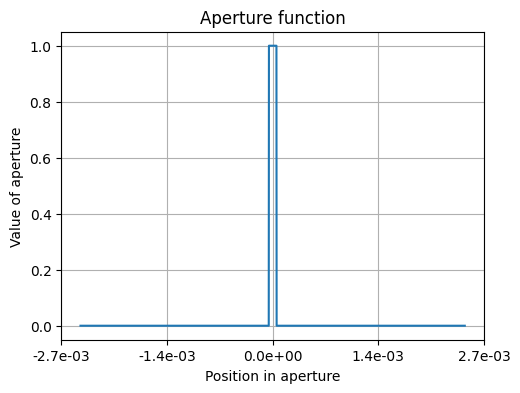

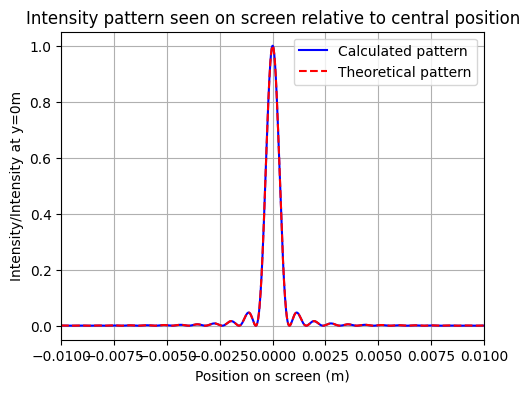

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def slit_aperture(total_extent, N, width):

    position = np.linspace(-total_extent/2, total_extent/2, N)
    slit = np.zeros(N, dtype = complex)
    slit[np.abs(position) <= width/2] = 1.0

    return slit, position

def fourier_diffraction(slit, N, dx, distance, wavelength):

    aperture_fft = np.fft.fftshift(np.fft.fft(slit))
    freq = np.fft.fftshift(np.fft.fftfreq(N, dx))

    screen_dist = distance * freq * wavelength / (2 * np.pi)

    intensity = aperture_fft ** 2

    intensity /= np.max(intensity)

    return intensity, screen_dist, freq

def aperture_plot(position, slit):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(position, slit)
    plt.xlabel('Position in aperture')
    plt.ylabel('Value of aperture')
    plt.title('Aperture function')
    plt.grid(True)
    ax = plt.gca()
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.linspace(start, end, 5))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1e'))
    plt.show()

def pattern_plot(screen_dist, intensity, theoretical_intensity):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 2)
    plt.plot(screen_dist, intensity, label="Calculated pattern", color = 'b')
    plt.plot(screen_dist, theoretical_intensity, label="Theoretical pattern", color = 'r', linestyle = '--')
    plt.xlabel('Position on screen (m)')
    plt.ylabel('Intensity/Intensity at y=0m')
    plt.title('Intensity pattern seen on screen relative to central position')
    plt.grid(True)
    plt.xlim(start_position, stop_position)
    plt.legend()
    plt.show()

wavelength = 500e-09
width = 100e-06
distance = 1
total_extent = 5e-03
N = 4096
dx = total_extent/N
start_position = -0.01
stop_position = 0.01

slit, position = slit_aperture(total_extent, N, width)
intensity, screen_dist, freq = fourier_diffraction(slit, N, dx, distance, wavelength)

theoretical_intensity = (np.sinc(width * freq)) ** 2

aperture_plot(position, slit)
pattern_plot(screen_dist, intensity, theoretical_intensity)

This shows the diffraction pattern on the screen as computed using an FFT technique and shows that it's the same as the theoretical pattern.

# Core Task 2:

Calculating the diffraction pattern from a sinusoidal diffraction grating, where slit extent = 2mm, and the phase of the amplitude is (m.2) sin(2pix/s), where m = 8, s = 100 microns and distance to the screen in 10m.

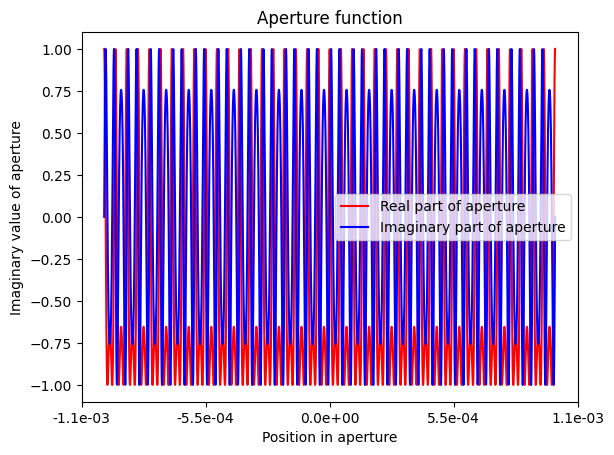

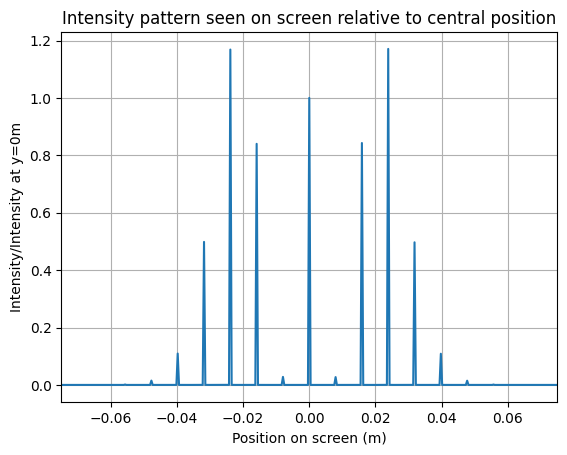

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def sin_aperture(total_extent, N, m, s):

    position = np.linspace(-total_extent/2, total_extent/2, N)
    sin_slit = np.zeros(N)
    phase = m / 2 * np.sin(2 * np.pi * position / s)
    sin_slit = np.exp(1j*phase)

    return sin_slit, position

def fourier_diffraction(sin_slit, N, dx, distance, wavelength):

    aperture_fft = np.fft.fftshift(np.fft.fft(sin_slit))
    freq = np.fft.fftshift(np.fft.fftfreq(N, dx))

    screen_dist = distance * freq * wavelength / (2 * np.pi)

    intensity = aperture_fft ** 2

    middle = int(N/2)

    intensity /= intensity[middle]

    return intensity, screen_dist

def aperture_plot(position, sin_slit):
    fig, ax1 = plt.subplots()
    ax1.plot(position, sin_slit.real, label = 'Real part of aperture', color = 'red')
    ax1.plot(position, sin_slit.imag, label="Imaginary part of aperture", color='blue')
    ax1.set_xlabel('Position in aperture')
    ax1.set_ylabel('Real value of aperture')
    ax1.legend()
    ax1.set_ylabel("Imaginary value of aperture")
    ax1.legend()
    ax1.set_title('Aperture function')
    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.linspace(start, end, 5))
    ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1e'))

def pattern_plot(screen_dist, intensity):
    fig, ax1 = plt.subplots()
    plt.plot(screen_dist, intensity)
    plt.xlabel('Position on screen (m)')
    plt.ylabel('Intensity/Intensity at y=0m')
    plt.title('Intensity pattern seen on screen relative to central position')
    plt.grid(True)
    plt.xlim(start_position, stop_position)
    plt.show()

wavelength = 500e-09
distance = 10
total_extent = 2e-03
s = 100e-06
m = 8
N = 4096
dx = total_extent/N
start_position = -0.075
stop_position = 0.075

sin_slit, position = sin_aperture(total_extent, N, m, s)
intensity, screen_dist = fourier_diffraction(sin_slit, N, dx, distance, wavelength)

aperture_plot(position, sin_slit)
pattern_plot(screen_dist, intensity)

We can see that the pattern is made up of lots of various frequencies, which make up the phase of the aperture.

# Core Task 3:

Modifying the program to include the near-field phase correction in the aperture function, for the same apertures in the last 2 tasks but for much smaller distances between the aperture and the screen.

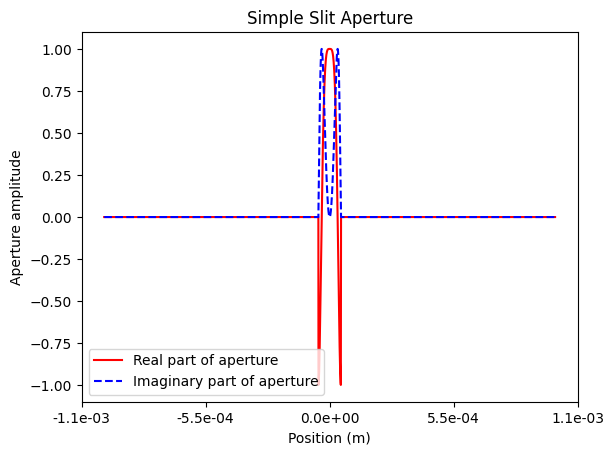

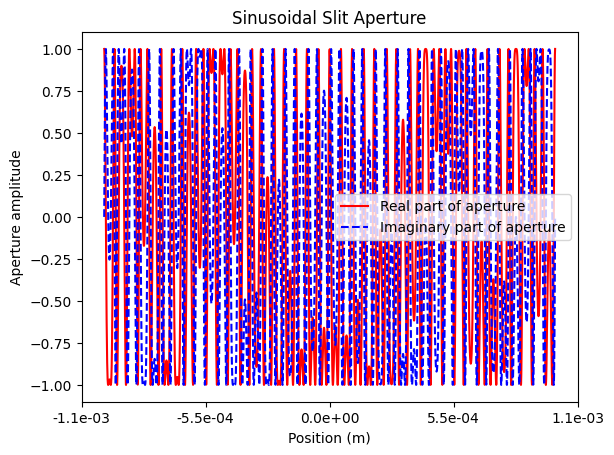

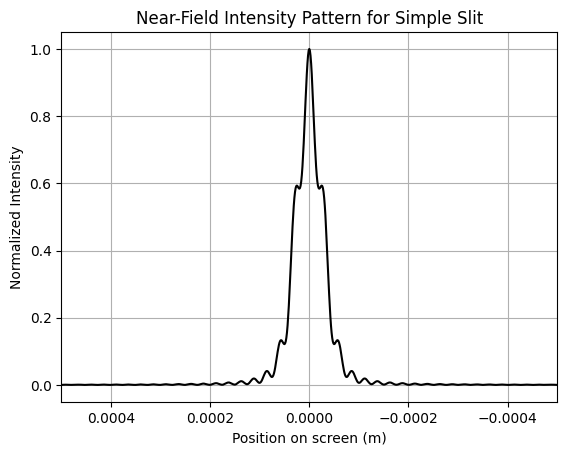

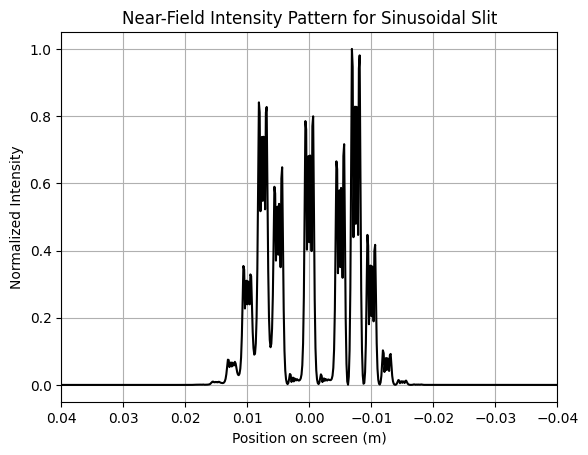

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


def slit_aperture_near(total_extent, N, width, position):
    slit = np.zeros(N, dtype=complex)
    slit[np.abs(position) <= width / 2] = 1.0  # Ensure the slit width is centered
    return slit

def sin_aperture_near(total_extent, N, m, s, position):
    phase = m / 2 * np.sin(2 * np.pi * position / s)
    sin_slit = np.exp(1j * phase)
    return sin_slit

def near_field_fourier_diffraction(aperture, position, N, dx, distance, wavelength):
    # Correct phase factor application for near-field diffraction
    quadratic_phase = np.exp(1j * np.pi / (wavelength * distance) * position ** 2)
    aperture *= quadratic_phase

    aperture_fft = np.fft.fftshift(np.fft.fft(aperture))
    freq = np.fft.fftshift(np.fft.fftfreq(N, dx))

    screen_dist = distance * freq * wavelength
    intensity = np.abs(aperture_fft) ** 2  # Corrected intensity calculation
    intensity /= np.max(intensity)  # Normalize to the maximum value for better visualization

    return intensity, screen_dist

def aperture_plot(position, aperture, title='Aperture function'):
    fig, ax1 = plt.subplots()
    ax1.plot(position, aperture.real, 'r-', label='Real part of aperture')
    if np.any(aperture.imag):
        ax1.plot(position, aperture.imag, 'b--', label='Imaginary part of aperture')
    ax1.set_xlabel('Position (m)')
    ax1.set_ylabel('Aperture amplitude')
    ax1.legend()
    ax1.set_title(title)

    start, end = ax1.get_xlim()
    ax1.xaxis.set_ticks(np.linspace(start, end, 5))
    ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1e'))

    plt.show()

def pattern_plot(screen_dist, intensity, end_point, title='Intensity pattern on screen'):
    plt.plot(screen_dist, intensity, 'k-')
    plt.xlabel('Position on screen (m)')
    plt.ylabel('Normalized Intensity')
    plt.title(title)
    plt.grid(True)
    plt.xlim(end_point, -end_point)
    plt.show()

# Parameters
wavelength = 500e-09  # 500 nm
distance_1 = 5e-03    # 5 mm
distance_2 = 0.5      # 0.5 m
total_extent = 2e-03  # 2 mm
width = 100e-06       # 100 µm
s = 100e-06           # 100 µm (for sinusoidal aperture)
m = 8                 # modulation depth
N = 4096              # sampling points
dx = total_extent / N
position = np.linspace(-total_extent / 2, total_extent / 2, N)
end_point_1 = 0.0005
end_point_2 = 0.04

# Aperture functions
slit = slit_aperture_near(total_extent, N, width, position)
sin_slit = sin_aperture_near(total_extent, N, m, s, position)

# Diffraction patterns
slit_intensity, slit_screen = near_field_fourier_diffraction(slit, position, N, dx, distance_1, wavelength)
sin_intensity, sin_screen = near_field_fourier_diffraction(sin_slit, position, N, dx, distance_2, wavelength)

# Plotting
aperture_plot(position, slit, title='Simple Slit Aperture')
aperture_plot(position, sin_slit, title='Sinusoidal Slit Aperture')

pattern_plot(slit_screen, slit_intensity, end_point_1, title='Near-Field Intensity Pattern for Simple Slit')
pattern_plot(sin_screen, sin_intensity, end_point_2, title='Near-Field Intensity Pattern for Sinusoidal Slit')


You can see that the diffraction patterns look right for the fresnel regime of the pattern.

# Supplementary Task 1:

Evaluate the cornu spiral

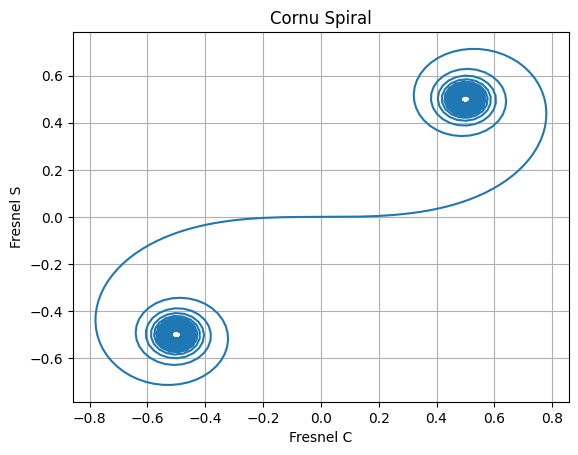

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the integrands for Fresnel S and C functions
def integrand_s(k):
    return np.sin(np.pi * k ** 2 / 2)

def integrand_c(k):
    return np.cos(np.pi * k ** 2 / 2)

# Compute the Fresnel integrals using quad
def fresnel_s(x):
    integral, _ = quad(integrand_s, 0, x)
    return integral

def fresnel_c(x):
    integral, _ = quad(integrand_c, 0, x)
    return integral

# Generate x values for plotting the Cornu spiral
x_values = np.linspace(-15, 15, 1000)

# Calculate Fresnel S and C values for each x
s_result = np.array([fresnel_s(x) for x in x_values])
c_result = np.array([fresnel_c(x) for x in x_values])

# Plot the Cornu spiral
plt.plot(c_result, s_result)
plt.xlabel('Fresnel C')
plt.ylabel('Fresnel S')
plt.title('Cornu Spiral')
plt.grid(True)
plt.show()

This shows a cornu spiral

# Supplementary Task 2:

Show the diffraction pattern of a single slit in the near field using the fresnel cornu spirals.

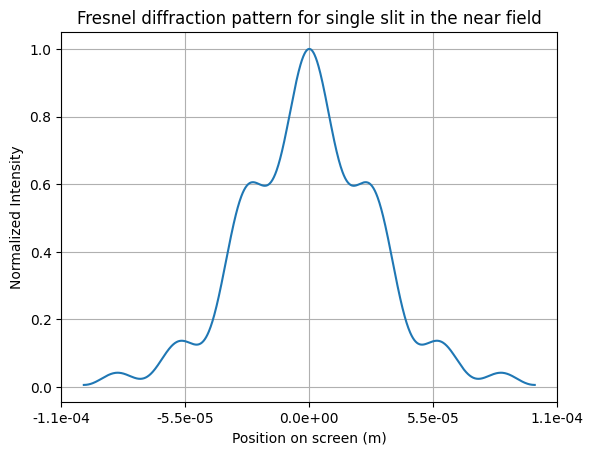

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import matplotlib.ticker as ticker

def fresnel(t):
    # Define the integrands for Fresnel S and C functions
    def integrand_s(t):
        return np.sin(np.pi * t ** 2 / 2)
    def integrand_c(t):
        return np.cos(np.pi * t ** 2 / 2)

    # Compute the Fresnel integrals using quad
    S_integral, _ = quad(integrand_s, 0, t)
    C_integral, _ = quad(integrand_c, 0, t)

    return S_integral, C_integral

def fresnel_diffraction(width, wavelength, distance, positions):
    scale = np.sqrt(2 / (wavelength * distance))

    intensity = np.zeros_like(positions)

    for i, position in enumerate(positions):
        u1 = scale * (position - width / 2)
        u2 = scale * (position + width / 2)

        S1, C1 = fresnel(u1)
        S2, C2 = fresnel(u2)

        intensity[i] = ((S2 - S1)**2 + (C2 - C1)**2)

    # Normalize the pattern
    intensity /= np.max(intensity)

    return intensity

def slit_aperture(total_extent, N, width):

    position = np.linspace(-total_extent, total_extent, N)
    slit = np.zeros(N)
    slit[np.abs(position) <= width] = 1.0

    return slit, position

def pattern_plot(position, intensity):
    plt.plot(position, intensity)
    plt.xlabel('Position on screen (m)')
    plt.ylabel('Normalized Intensity')
    plt.title('Fresnel diffraction pattern for single slit in the near field')
    plt.grid(True)
    ax = plt.gca()
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.linspace(start, end, 5))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1e'))
    plt.show()

# Parameters
wavelength = 500e-09  # Wavelength of light in meters
width = 100e-06  # Width of the slit in meters
distance = 5e-03   # Distance from aperture to screen
total_extent = 1e-04  # Total extent aperture
N = 1000  # Number of points to calculate


slit, position = slit_aperture(total_extent, N, width)

# Calculate the Fresnel diffraction pattern
intensity = fresnel_diffraction(width, wavelength, distance, position)

# Plot the diffraction pattern
pattern_plot(position, intensity)


This shows the same pattern as calculated in the core task 3, therefore the methods agree.